In [1]:
# import pandas as pd # Import the pandas library and assign it to the alias 'pd'

# # Use pd.read_excel to read an Excel file instead of pd.read_csv
# df = pd.read_excel("/content/data_mproject_news_clas.xlsx")

The first column identifies the news.

The second and third are the title and text.

The fourth column has labels denoting whether the news is REAL or FAKE.

In [2]:
import pandas as pd
import zipfile

# Open the zip file in read mode
with zipfile.ZipFile('/content/fake_or_real_news.csv (1).zip', 'r') as zip_ref:
    # Extract the CSV file to a temporary file
    zip_ref.extract('fake_or_real_news.csv')

# Read the extracted CSV file into a pandas DataFrame
df = pd.read_csv('fake_or_real_news.csv')

# Now you can work with the data in the DataFrame
print(df.head())

   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#Get last five rows of the dataset
df.tail()

,Unnamed: 0,title,text,label
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL
6334,4330,Jeb Bush Is Suddenly Attacking Trump. Here's W...,Jeb Bush Is Suddenly Attacking Trump. Here's W...,REAL


In [5]:
df.label.value_counts()


,count
label,
REAL,3171
FAKE,3164


In [6]:
import pandas as pd


# Drop the 'Unnamed: 0' and 'title' columns
df = df.drop(['Unnamed: 0','title'], axis=1)



 Exploring dataset

In [7]:
df.shape

(6335, 2)

In [8]:
df.describe()


,text,label
count,6335,6335
unique,6060,2
top,"Killing Obama administration rules, dismantlin...",REAL
freq,58,3171


In [9]:
df.duplicated().sum()


275

In [10]:
df.drop_duplicates(inplace=True)
df.shape

(6060, 2)

 Checking for null values or missing values


In [11]:
#False: If the corresponding element in the original DataFrame is not a missing value.
df.isnull()


,text,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
6330,False,False
6331,False,False
6332,False,False
6333,False,False


In [12]:
df.isnull().sum()


,0
text,0
label,0


In [13]:
# !pip install plotly
import plotly.graph_objects as go # Import the plotly.graph_objects module and alias it as 'go'

i=df.label.value_counts()
fig = go.Figure(data=[go.Bar( # Now 'go' is defined and can be used
            x=['Real','Fake'], y=i,
            text=i,
            textposition='auto',
        )])

fig.show()

In [14]:
# !pip install plotly
import plotly.express as px # Import the plotly.express module and alias it as 'px'
import plotly.graph_objects as go # Import the plotly.graph_objects module and alias it as 'go'

#real vs fake
fig = px.pie(df,names='label',title='Proportion of Real vs. Fake News', color_discrete_sequence=px.colors.sequential.RdBu) # Now you can call px.pie()
fig.show()

balansed class (:

# **Text** **Preprocessing**

## lowercase

In [15]:
# lowercase
# Convert the 'text' column to lowercase and store it in a new column called 'text_lower'
df["text_lower"] = df["text"].str.lower()
df.head() # Display the first few rows of the DataFrame to verify the changes

,text,label,text_lower
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"daniel greenfield, a shillman journalism fello..."
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s. secretary of state john f. kerry said mon...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"— kaydee king (@kaydeeking) november 9, 2016 t..."
4,It's primary day in New York and front-runners...,REAL,it's primary day in new york and front-runners...


## punctuation characters

In [16]:

import string # Import the 'string' module to access string-related functions and constants

print(string.punctuation) # Print the set of punctuation characters defined in the 'string' module

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [17]:
#punctuation removal
# Define a variable to store the set of punctuation characters to remove
PUNCT_TO_REMOVE = string.punctuation

# Define a custom function to remove punctuation from a given text
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

# Apply the 'remove_punctuation' function to the 'text_lower' column and store the result in a new column 'text_wo_punct'
df["text_wo_punct"] = df["text_lower"].apply(lambda text: remove_punctuation(text))

# Display the first few rows of the DataFrame to verify the punctuation removal
df.head()

,text,label,text_lower,text_wo_punct
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"daniel greenfield, a shillman journalism fello...",daniel greenfield a shillman journalism fellow...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s. secretary of state john f. kerry said mon...,us secretary of state john f kerry said monday...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"— kaydee king (@kaydeeking) november 9, 2016 t...",— kaydee king kaydeeking november 9 2016 the l...
4,It's primary day in New York and front-runners...,REAL,it's primary day in new york and front-runners...,its primary day in new york and frontrunners h...


## Expands_contractions

In [18]:
 ! pip install contractions


In [19]:
import contractions # Import the 'contractions' library for expanding contractions

# Define a function to expand contractions and replace special characters
def Expands_contractions(text):
    """
    Replaces special characters with words and expands contractions:
        '%' with ' percent'
        '$' with ' dollar'
        '€' with ' euro'
        Expands contractions like "can't" to "cannot"
    """
    text = text.replace('%', ' percent')
    text = text.replace('$', ' dollar')
    text = text.replace('€', ' euro')
    text = text.replace('—', ' ')
    # Expand contractions using the 'contractions.fix' function
    text = contractions.fix(text)

    return text # Return the modified text

In [20]:
 #Apply the clean_text function to the 'text' column of the DataFrame
df['Expanding Contractions'] = df['text_wo_punct'].apply(Expands_contractions)

## stopwords

In [21]:
# Import the NLTK library
import nltk

# Download the 'stopwords' dataset.
# This is essential for using stopwords.words('english') later.
nltk.download('stopwords')

# Import the 'stopwords' module from NLTK's corpus.
# This allows you to access the list of stopwords for various languages.
from nltk.corpus import stopwords

# Get the list of English stopwords and join them into a single string separated by commas and spaces.
# This is useful for displaying or using the stopwords in other parts of your code.
", ".join(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [22]:

# Download the 'stopwords' dataset if you haven't already
nltk.download('stopwords')

# Import the 'stopwords' module from NLTK's corpus
from nltk.corpus import stopwords

# Create a set of English stopwords for efficient lookup
STOPWORDS = set(stopwords.words('english'))

# Define a function to remove stopwords from a given text
def remove_stopwords(text):
    """
    This function removes stopwords from a given text.

    Args:
        text (str): The input text.

    Returns:
        str: The text with stopwords removed.
    """
    # Split the text into words, filter out stopwords, and rejoin the remaining words
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

# Apply the 'remove_stopwords' function to the 'Expanding Contractions' column of the DataFrame
# and store the result in a new column called 'text_wo_stop'
df["text_wo_stop"] = df["Expanding Contractions"].apply(lambda text: remove_stopwords(text))

# Display the first few rows of the DataFrame to verify the stopword removal
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,label,text_lower,text_wo_punct,Expanding Contractions,text_wo_stop
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"daniel greenfield, a shillman journalism fello...",daniel greenfield a shillman journalism fellow...,daniel greenfield a shillman journalism fellow...,daniel greenfield shillman journalism fellow f...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s. secretary of state john f. kerry said mon...,us secretary of state john f kerry said monday...,us secretary of state john f kerry said monday...,us secretary state john f kerry said monday st...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"— kaydee king (@kaydeeking) november 9, 2016 t...",— kaydee king kaydeeking november 9 2016 the l...,kaydee king kaydeeking november 9 2016 the l...,kaydee king kaydeeking november 9 2016 lesson ...
4,It's primary day in New York and front-runners...,REAL,it's primary day in new york and front-runners...,its primary day in new york and frontrunners h...,its primary day in new york and frontrunners h...,primary day new york frontrunners hillary clin...


In [23]:
from nltk.stem.porter import PorterStemmer # Import the PorterStemmer for stemming words

stemmer = PorterStemmer() # Create a PorterStemmer object

# Define a function to stem words in a given text
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

# Apply the 'stem_words' function to the 'text_wo_stop' column and store the stemmed text in 'text_preprocessing'
df["text_preprocessing"] = df["text_wo_stop"].apply(lambda text: stem_words(text))
import matplotlib.pyplot as plt
import re  # Import the regular expression module




# Display the first few rows of the DataFrame to verify the stemming process
df.head()

,text,label,text_lower,text_wo_punct,Expanding Contractions,text_wo_stop,text_preprocessing
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"daniel greenfield, a shillman journalism fello...",daniel greenfield a shillman journalism fellow...,daniel greenfield a shillman journalism fellow...,daniel greenfield shillman journalism fellow f...,daniel greenfield shillman journal fellow free...
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,google pinterest digg linkedin reddit stumbleu...,googl pinterest digg linkedin reddit stumbleup...
2,U.S. Secretary of State John F. Kerry said Mon...,REAL,u.s. secretary of state john f. kerry said mon...,us secretary of state john f kerry said monday...,us secretary of state john f kerry said monday...,us secretary state john f kerry said monday st...,us secretari state john f kerri said monday st...
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"— kaydee king (@kaydeeking) november 9, 2016 t...",— kaydee king kaydeeking november 9 2016 the l...,kaydee king kaydeeking november 9 2016 the l...,kaydee king kaydeeking november 9 2016 lesson ...,kayde king kaydeek novemb 9 2016 lesson tonigh...
4,It's primary day in New York and front-runners...,REAL,it's primary day in new york and front-runners...,its primary day in new york and frontrunners h...,its primary day in new york and frontrunners h...,primary day new york frontrunners hillary clin...,primari day new york frontrunn hillari clinton...


In [24]:

# # Remove numbers from the text column
# df['text_preprocessing']=df['text_preprocessing'].apply(lambda x: re.sub(r'\d+', '', x))  # Remove digits using regex using the 'texts' Series
# df.head()

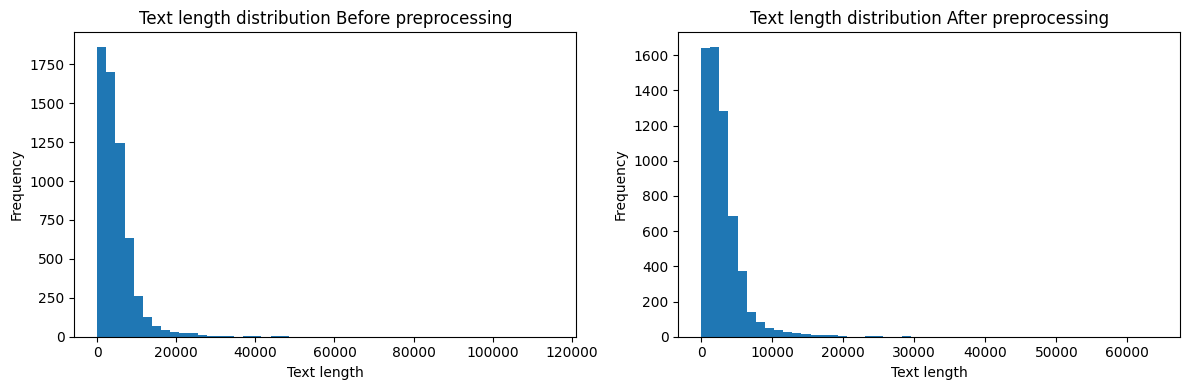

In [25]:
import matplotlib.pyplot as plt

# Create a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))  # Adjust figsize as needed

# Plot text length distribution before preprocessing on the first subplot
axes[0].hist(df['text'].str.len(), bins=50)
axes[0].set_title('Text length distribution Before preprocessing')
axes[0].set_xlabel('Text length')
axes[0].set_ylabel('Frequency')

# Plot text length distribution after preprocessing on the second subplot
axes[1].hist(df['text_preprocessing'].str.len(), bins=50)
axes[1].set_title('Text length distribution After preprocessing')
axes[1].set_xlabel('Text length')
axes[1].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [26]:
all_columns = df.columns.tolist()
all_columns

['text',
 'label',
 'text_lower',
 'text_wo_punct',
 'Expanding Contractions',
 'text_wo_stop',
 'text_preprocessing']

In [27]:
df = df.drop(['text_lower', 'text_wo_punct', 'Expanding Contractions', 'text_wo_stop', 'text'], axis=1)

In [28]:
df.head()

,label,text_preprocessing
0,FAKE,daniel greenfield shillman journal fellow free...
1,FAKE,googl pinterest digg linkedin reddit stumbleup...
2,REAL,us secretari state john f kerri said monday st...
3,FAKE,kayde king kaydeek novemb 9 2016 lesson tonigh...
4,REAL,primari day new york frontrunn hillari clinton...


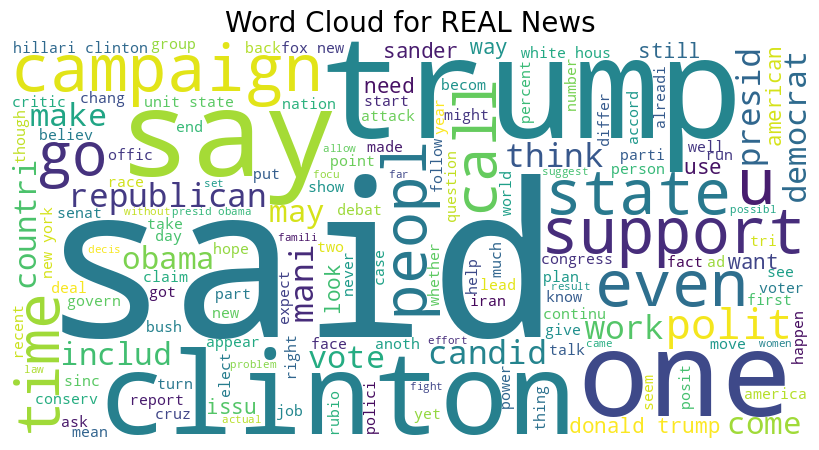

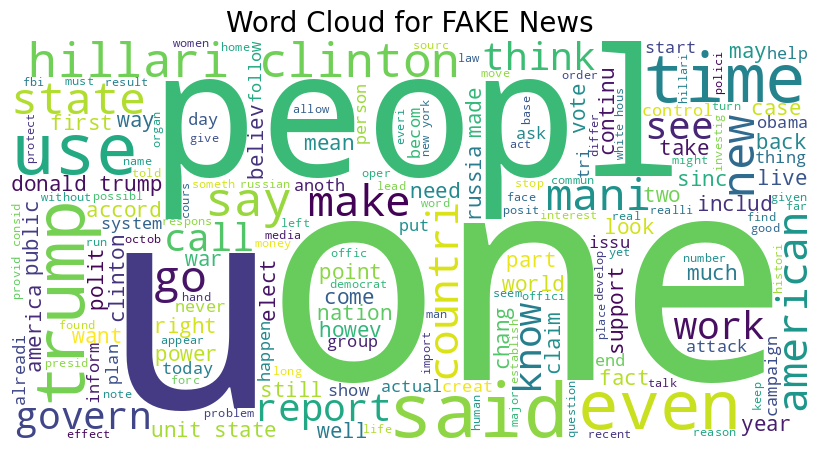

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Function to create wordcloud for each class
def create_wordcloud(data, title):
    # Filter data for the specific class (REAL or FAKE)
    class_data = data[data['label'] == title]

    # Extract the text data
    text = ' '.join(class_data['text_preprocessing'].astype(str).tolist())

    # Create a WordCloud object with customization
    wordcloud = WordCloud(
        width=800, height=400,
        background_color='white',
        stopwords=STOPWORDS,  # Remove common stop words
        min_font_size=10
    ).generate(text)

    # Display the wordcloud using Matplotlib
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f"Word Cloud for {title} News", fontsize=20)
    plt.show()

# Create wordclouds for REAL and FAKE classes
create_wordcloud(df, 'REAL')
create_wordcloud(df, 'FAKE')

**Label Encoding**

In [30]:
# !pip install scikit-learn
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame and 'label' is the column to encode
label_encoder = LabelEncoder()
df['label_encoded'] =label_encoder.fit_transform(df['label'])

# Display the first few rows to see the encoded labels
df.head()

,label,text_preprocessing,label_encoded
0,FAKE,daniel greenfield shillman journal fellow free...,0
1,FAKE,googl pinterest digg linkedin reddit stumbleup...,0
2,REAL,us secretari state john f kerri said monday st...,1
3,FAKE,kayde king kaydeek novemb 9 2016 lesson tonigh...,0
4,REAL,primari day new york frontrunn hillari clinton...,1


**TF-IDF Vectorizer**

In [31]:

# # Create a TF-IDF Vectorizer object
# vectorizer = TfidfVectorizer()

# # Fit the vectorizer to your text data (e.g., 'text_preprocessing' column)
# vectorizer.fit(df['text_preprocessing'])

# # Transform your text data into a TF-IDF matrix
# tfidf_x = vectorizer.transform(df['text_preprocessing'])

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)


In [33]:
from sklearn.model_selection import train_test_split
# Assuming 'df' is your DataFrame, 'label_encoded' is your target variable, and 'text_preprocessing' is your feature

# Split data into training and testing sets
X = df['text_preprocessing'] # Features
y = df['label_encoded'] # Target variable
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed


In [35]:
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

# **ML Model**

# 1.1 Random Forest

In [36]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report



# 1. Create a Random Forest Classifier object
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# 2. Train the classifier on the training data
rf_classifier.fit(tfidf_train, y_train)

# 3. Make predictions on the test data
y_pred = rf_classifier.predict(tfidf_test)

# 4. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       607
           1       0.89      0.87      0.88       605

    accuracy                           0.88      1212
   macro avg       0.88      0.88      0.88      1212
weighted avg       0.88      0.88      0.88      1212



# 1.2 Random Forest, with n-grams as features

In [37]:
# !pip install scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split # you need this for test/train splitting
# Assuming you have 'df' DataFrame with 'text_preprocessing' and 'label_encoded' columns

# 1. Create a TF-IDF Vectorizer with n-grams
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  # Include unigrams and bigrams
                                   max_features=5000,  # Limit the number of features (optional)
                                   stop_words='english')  # Remove common English stop words

# 3. Fit and transform the vectorizer on the training data
X_train_ngrams = ngram_vectorizer.fit_transform(x_train)

# 4. Transform the testing data using the fitted vectorizer
X_test_ngrams = ngram_vectorizer.transform(x_test)

# 5. Create and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_ngrams, y_train)

# 6. Make predictions on the test data
y_pred = rf_classifier.predict(X_test_ngrams)

# 7. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       607
           1       0.92      0.87      0.89       605

    accuracy                           0.90      1212
   macro avg       0.90      0.90      0.90      1212
weighted avg       0.90      0.90      0.90      1212



#  2. SVM Classifier

In [38]:
# !pip install scikit-learn

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have already executed the code from previous cells to create:
# - tfidf_train: TF-IDF representation of training data
# - tfidf_test: TF-IDF representation of testing data
# - y_train: Training labels
# - y_test: Testing labels

# 1. Create an SVM Classifier object
svm_classifier = SVC(kernel='linear', random_state=42)  # Adjust hyperparameters as needed

# 2. Train the classifier on the training data
svm_classifier.fit(tfidf_train, y_train)

# 3. Make predictions on the test data
y_pred = svm_classifier.predict(tfidf_test)

# 4. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.92      0.94      0.93       607
           1       0.94      0.92      0.93       605

    accuracy                           0.93      1212
   macro avg       0.93      0.93      0.93      1212
weighted avg       0.93      0.93      0.93      1212



# 3.1 KNN Classifier

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming you have tfidf_train, tfidf_test, y_train, y_test

best_accuracy = 0  # Initialize best accuracy
best_k = 1  # Initialize best k

# Iterate through a range of k values
for k in range(1, 20):  # You can adjust the range as needed
    # Create and train the KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(tfidf_train, y_train)

    # Make predictions on the test data
    y_pred = knn_classifier.predict(tfidf_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Update best accuracy and k if current k performs better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k: {best_k}")
print(f"Best accuracy: {best_accuracy:.2f}")

# Now you can use best_k to create your final KNN model
final_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
final_knn_classifier.fit(tfidf_train, y_train)

Best k: 3
Best accuracy: 0.87


KNeighborsClassifier(n_neighbors=3)

# 4. Naive Bayes classifier

In [42]:
!pip install scikit-learn

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# 5. Create and train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(tfidf_train, y_train)

# 6. Make predictions on the test data
y_pred = nb_classifier.predict(tfidf_test)

# 7. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.96      0.68      0.80       607
           1       0.75      0.97      0.85       605

    accuracy                           0.83      1212
   macro avg       0.86      0.83      0.82      1212
weighted avg       0.86      0.83      0.82      1212



In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split  # Assuming you've already imported this

# 1. Create a TF-IDF Vectorizer with n-grams
ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2),  # Include unigrams and bigrams
                                   max_features=5000,  # Limit the number of features (optional)
                                   stop_words='english')  # Remove common English stop words

# 2. Fit and transform the vectorizer on the training data
X_train_ngrams = ngram_vectorizer.fit_transform(x_train)

# 3. Transform the testing data using the fitted vectorizer
X_test_ngrams = ngram_vectorizer.transform(x_test)


# 4. Define and train the classifiers
classifiers = {
    'Naive Bayes': MultinomialNB(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Random Forest with N-grams': RandomForestClassifier() #add randomforst with n-gram
}

results = {}  # Store results for each classifier

for name, classifier in classifiers.items():
    if name == 'Random Forest with N-grams':
        # Train and evaluate Random Forest with N-grams separately
        classifier.fit(X_train_ngrams, y_train)
        y_pred = classifier.predict(X_test_ngrams)
    else:
        # Train and evaluate other classifiers as before
        classifier.fit(tfidf_train, y_train)
        y_pred = classifier.predict(tfidf_test)

    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }


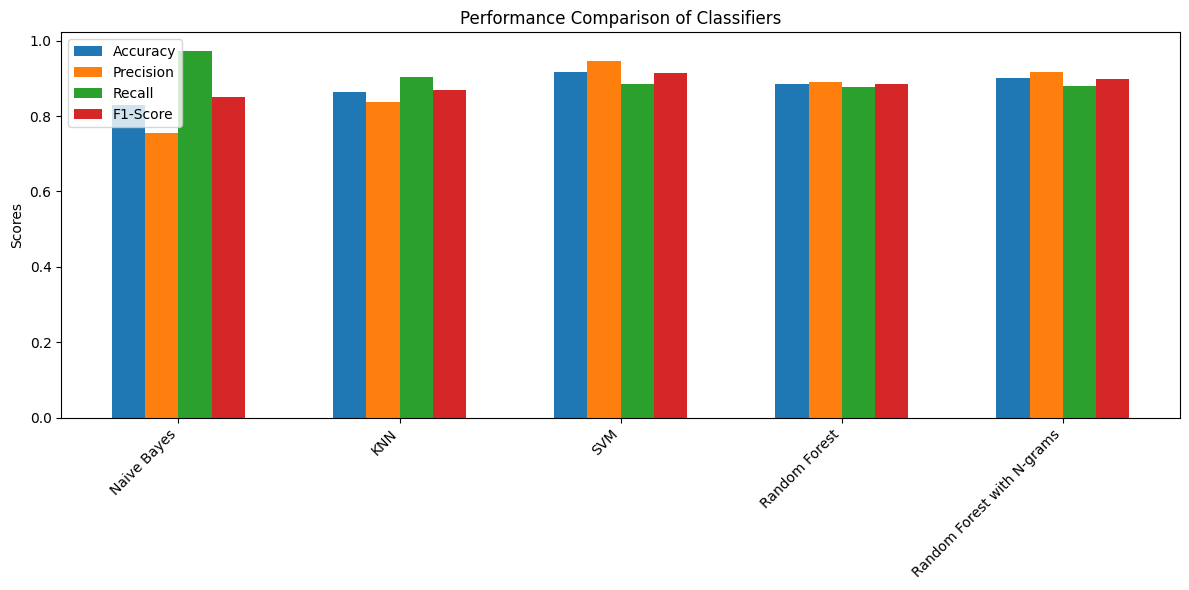

In [45]:

# 5. Create the bar chart
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(classifiers))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Create bars for each metric for each classifier
rects1 = ax.bar(x - 1.5*width, [results[name]['Accuracy'] for name in classifiers], width, label='Accuracy')
rects2 = ax.bar(x - 0.5*width, [results[name]['Precision'] for name in classifiers], width, label='Precision')
rects3 = ax.bar(x + 0.5*width, [results[name]['Recall'] for name in classifiers], width, label='Recall')
rects4 = ax.bar(x + 1.5*width, [results[name]['F1-Score'] for name in classifiers], width, label='F1-Score')

# Add labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Performance Comparison of Classifiers')
ax.set_xticks(x)
ax.set_xticklabels(classifiers.keys(), rotation=45, ha='right')  # Rotate x-axis labels for better readability
ax.legend()

fig.tight_layout()

plt.show()